In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# New section

In [ ]:
# read the data
df = pd.read_csv('/Loan_Modelling (2).csv')
# returns the first 5 rows
df.head(5)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.shape
# there are 5000 observations and 14 features

(5000, 14)

In [ ]:
df.info()
# all the data types are numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

#there are no missing values all show 0

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
df = df.drop(['ID'], axis=1)

#drop Id as it is not used for analysis and not required.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.groupby('Personal_Loan')['Personal_Loan'].value_counts()
# Personal loan taken are 480 which is less than 50% of not taken loan.

,count
Personal_Loan,
0,4520
1,480


In [ ]:
df.groupby('Family')['Family'].value_counts()


,count
Family,
1,1472
2,1296
3,1010
4,1222


In [ ]:
df.groupby('CreditCard')['CreditCard'].value_counts()
# credit card having count is 1470 and not having is 3530 which is 50% more than who have taken.

,count
CreditCard,
0,3530
1,1470


In [ ]:
df.groupby('Education')['Education'].value_counts()
#there are 3 levels of educations 1, 2 and 3 which have almost equal distribution of data.

,count
Education,
1,2096
2,1403
3,1501


In [ ]:
df.groupby('Securities_Account')['Securities_Account'].value_counts()
# No securities account is more and having securities account is only 522 which is very small count.

,count
Securities_Account,
0,4478
1,522


In [ ]:
df.groupby('Online')['Online'].value_counts()

,count
Online,
0,2016
1,2984


In [ ]:
df.groupby('CD_Account')['CD_Account'].value_counts()
# having cd account is only 302 and no cd account is 4698 which is very high.

,count
CD_Account,
0,4698
1,302


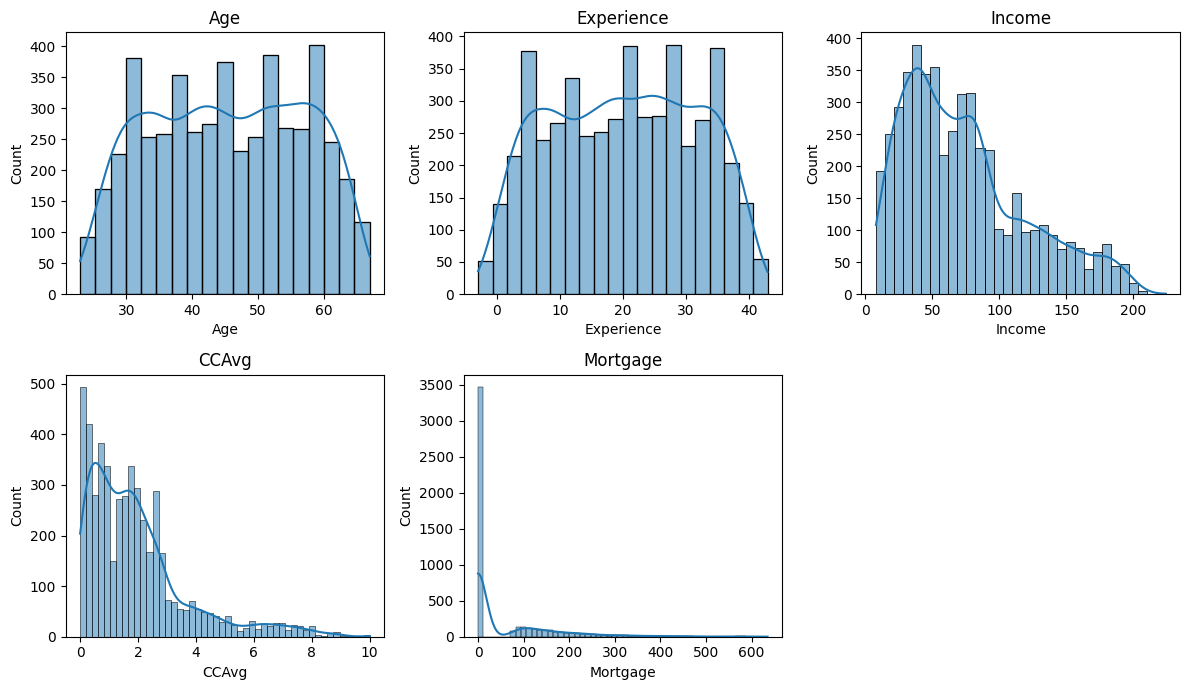

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Filter only numeric columns
features_numeric =['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

# Create subplots
plt.figure(figsize=(12, 7))

for i, feature in enumerate(features_numeric):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

#Age: Most customers are middle-aged, with an average age of 45. The youngest is 23 and the oldest is 67 — a good mix of young professionals and seasoned individuals.

#Experience: On average, people have about 20 years of work experience, which lines up with the age profile. However, a few negative values may point to data entry mistakes.

#Income: There's a wide income range. While many earn around $64K annually, some go up to $224K — showing that there’s a small group of high-income individuals in the mix.

#Credit Card Spending (CCAvg): Most people spend moderately on their credit cards — about $1.9K per month — but a few big spenders push the numbers up.

#Mortgage: A large number of customers have no mortgage at all, but a few have hefty ones reaching up to $635K, hinting at a small group investing heavily in property.

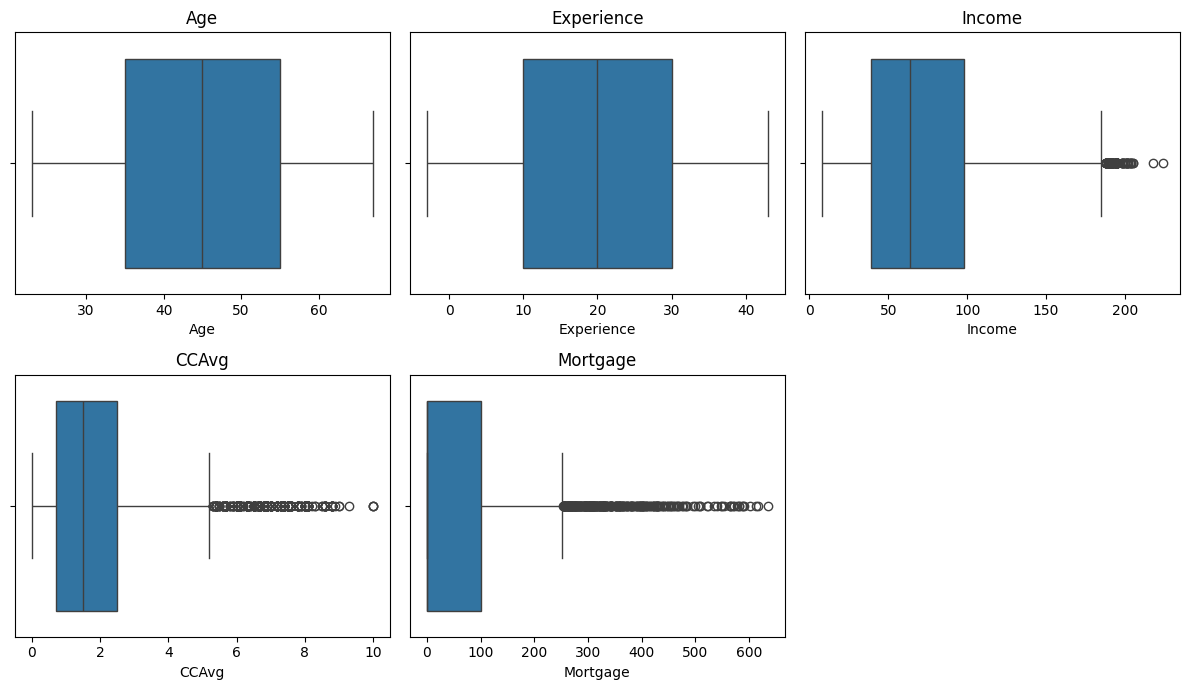

In [ ]:
# Filter only numeric columns
features_numeric =['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

# Create subplots
plt.figure(figsize=(12, 7))

for i, feature in enumerate(features_numeric):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()



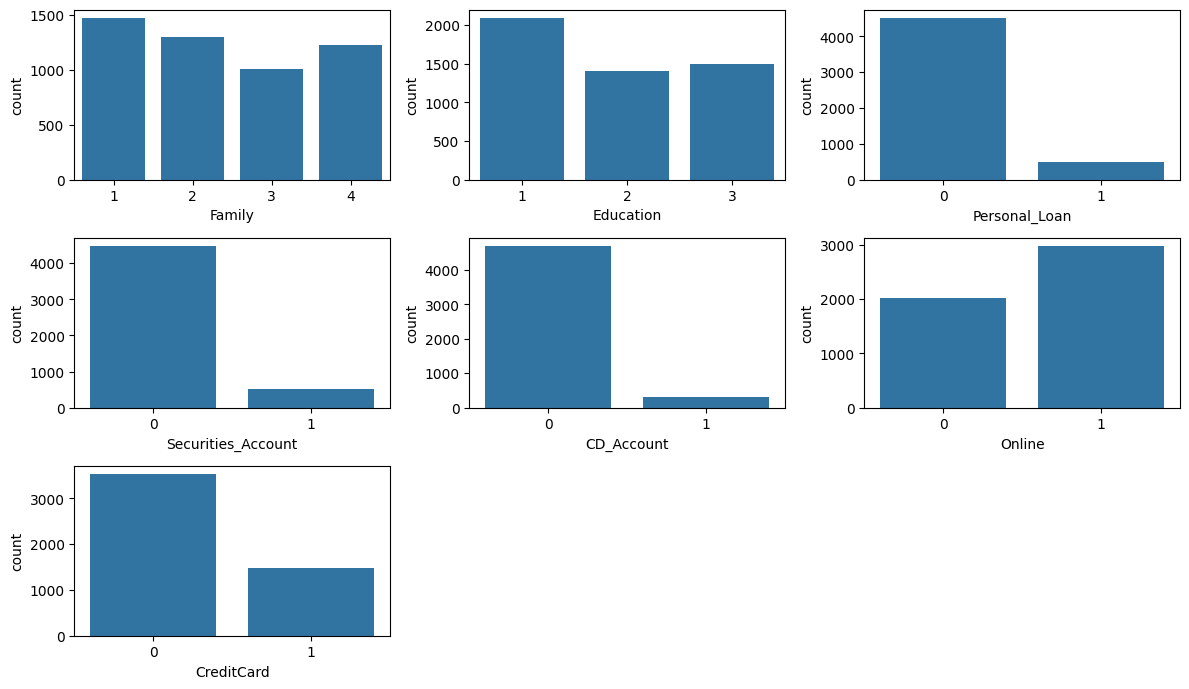

In [ ]:
plt.figure(figsize=(12,7))
features_categorical=['Family', 'Education', 'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard']
for i, feature in enumerate(features_categorical):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=feature)
plt.tight_layout();

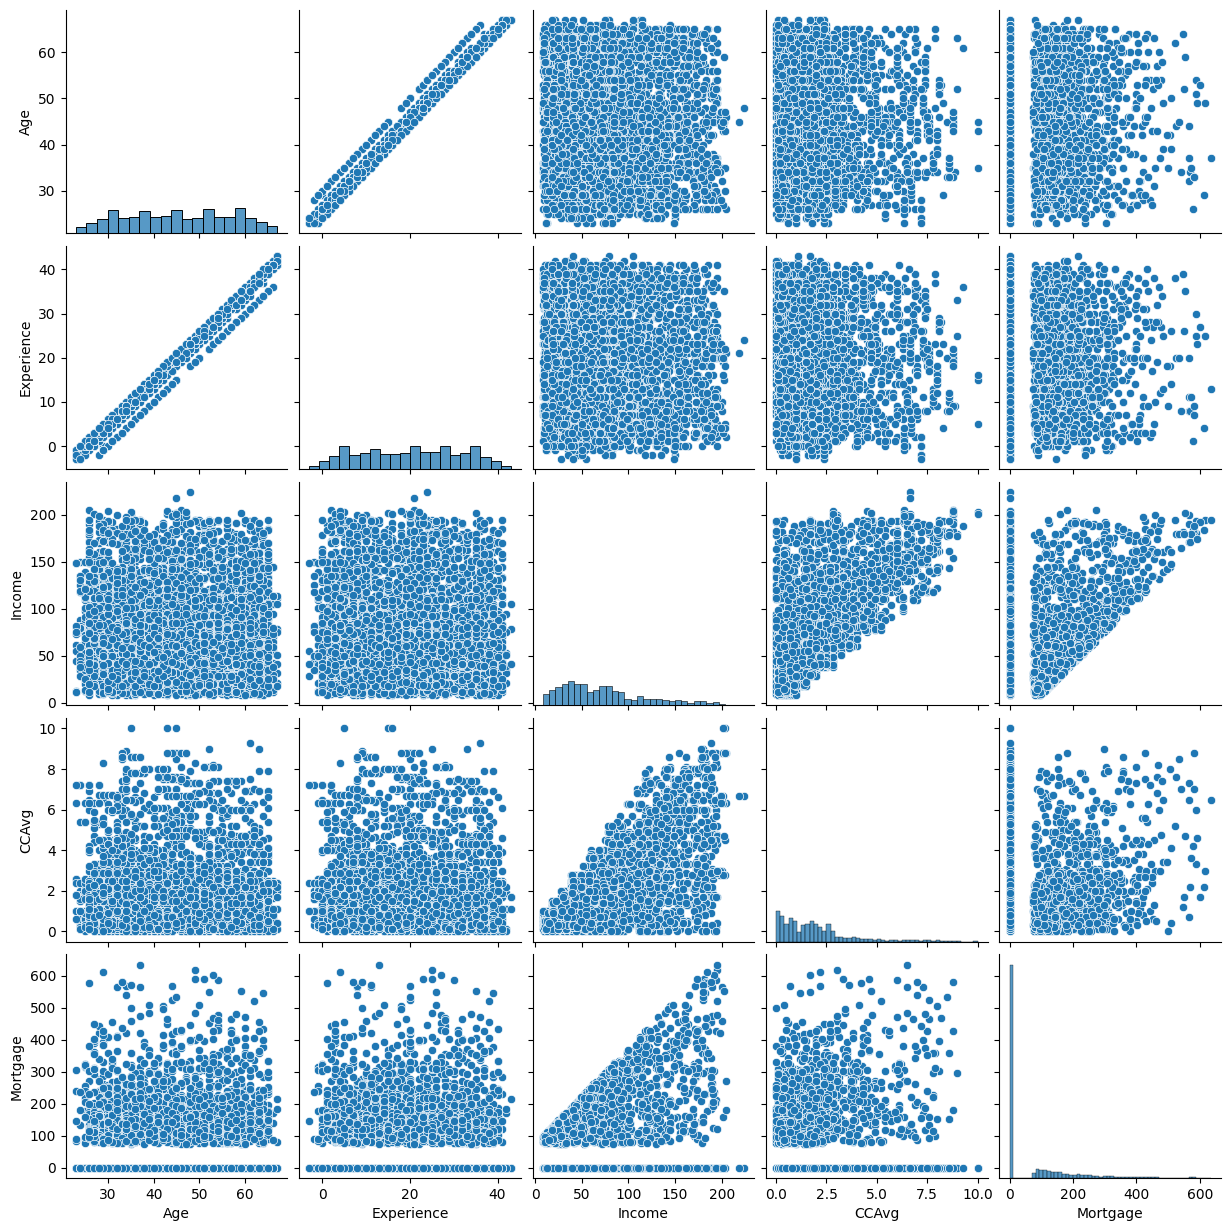

In [ ]:
#pair plot of numeric cols
df_numerics=df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
sns.pairplot(data=df_numerics)

# age and experience show positive correalation.

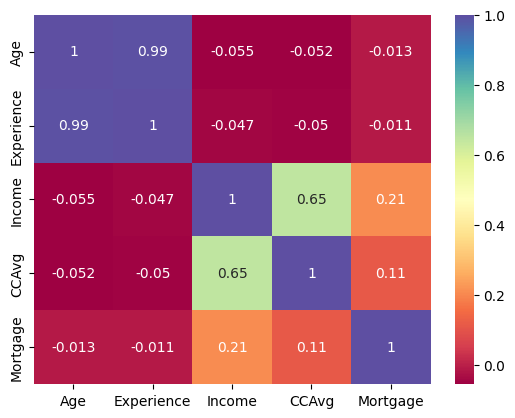

In [ ]:

sns.heatmap(data = df_numerics.corr(),annot=True,cmap='Spectral');

# experience and age show very high positive correlation.
# income and ccavg show positive correlation correlation of 65%.

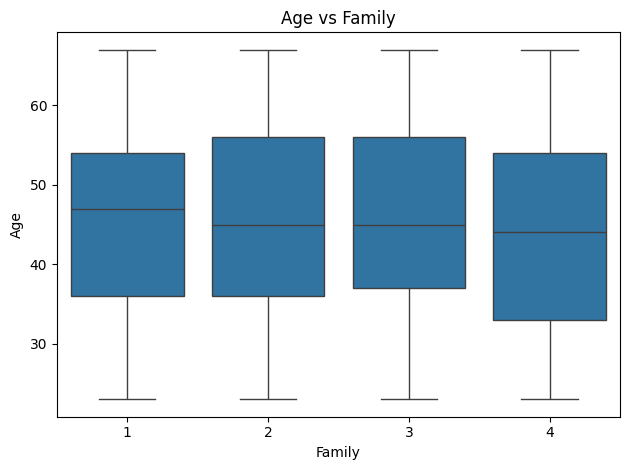

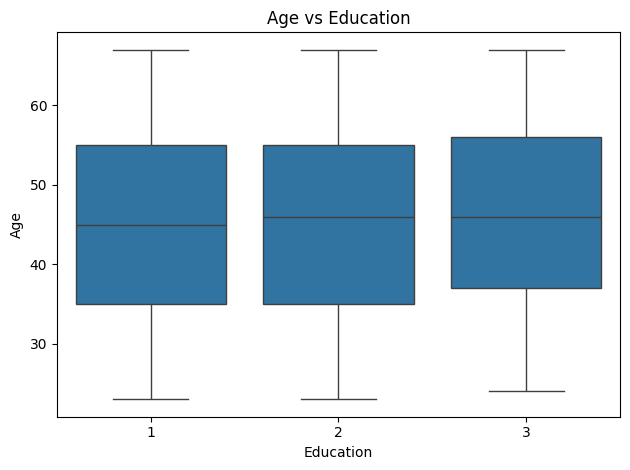

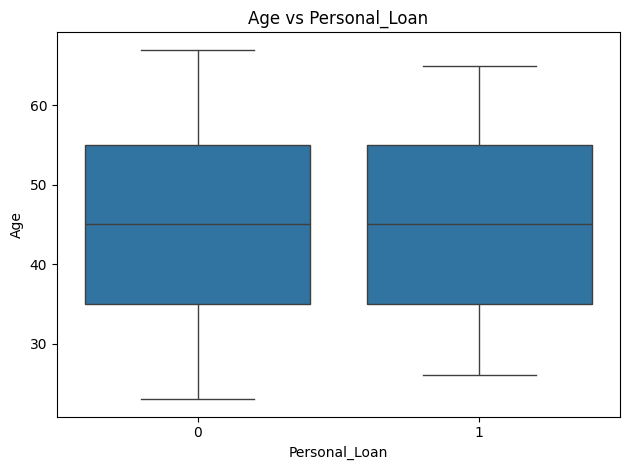

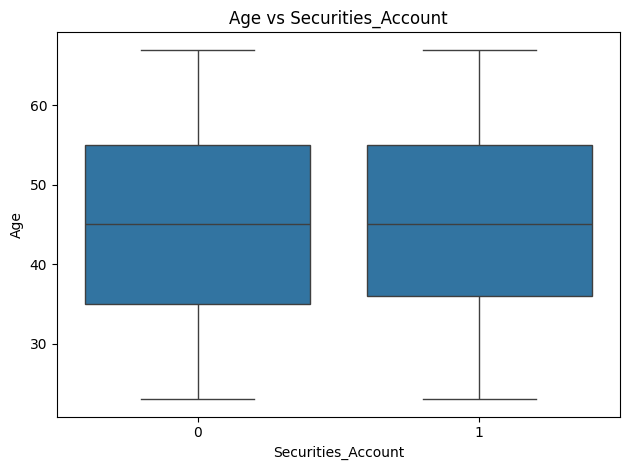

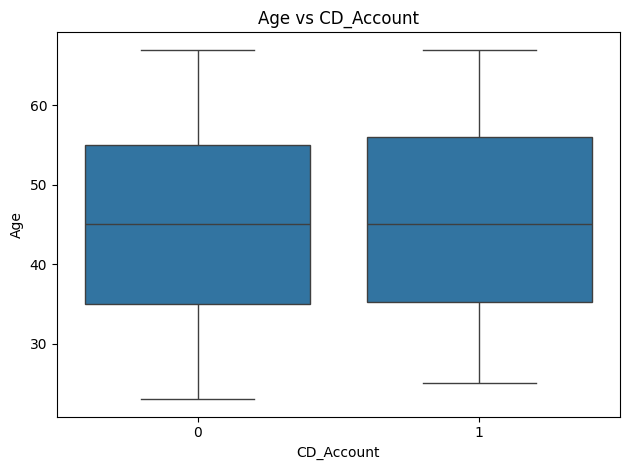

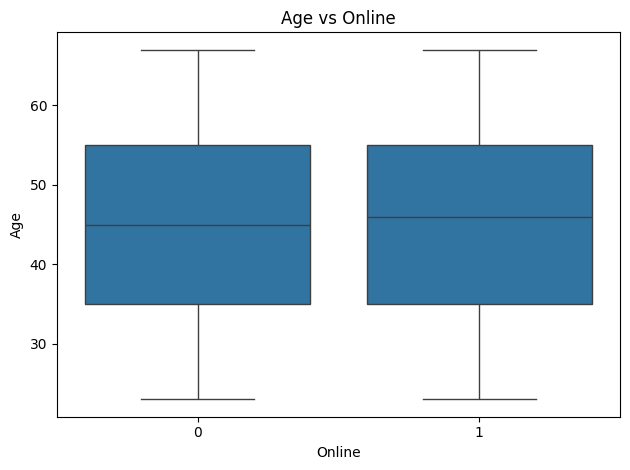

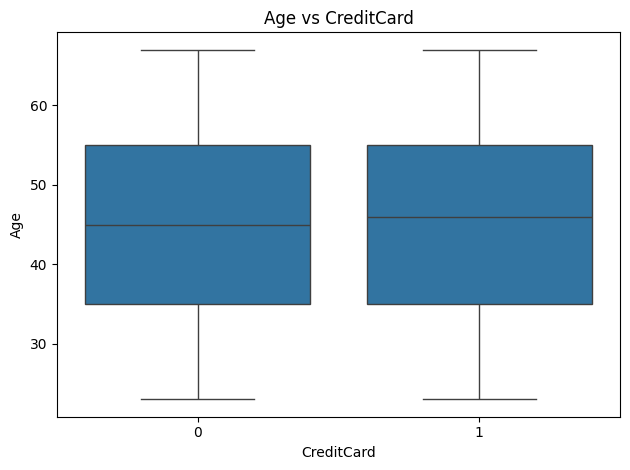

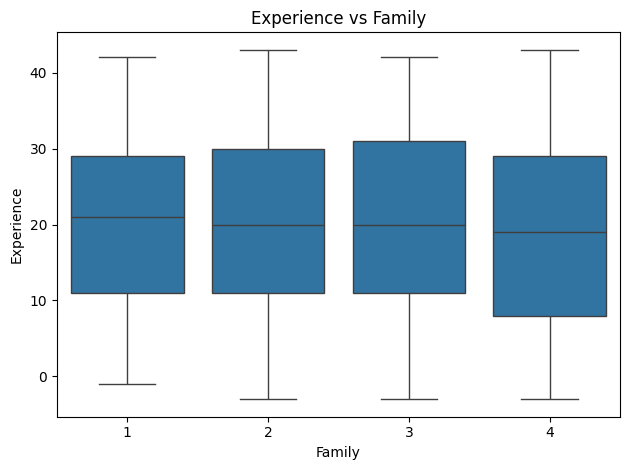

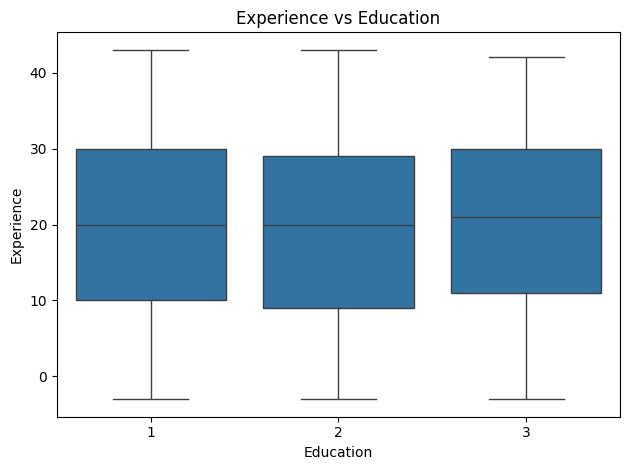

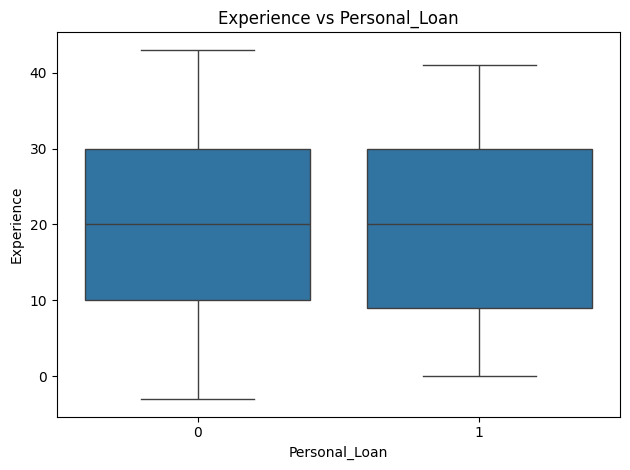

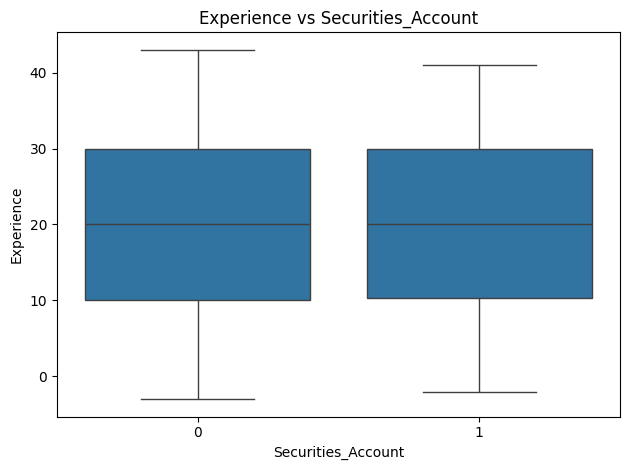

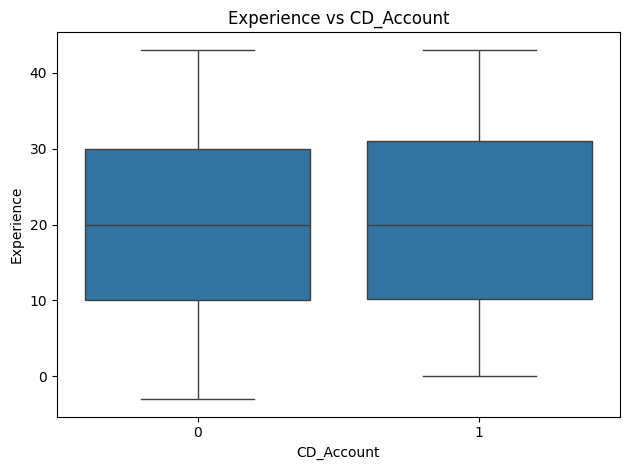

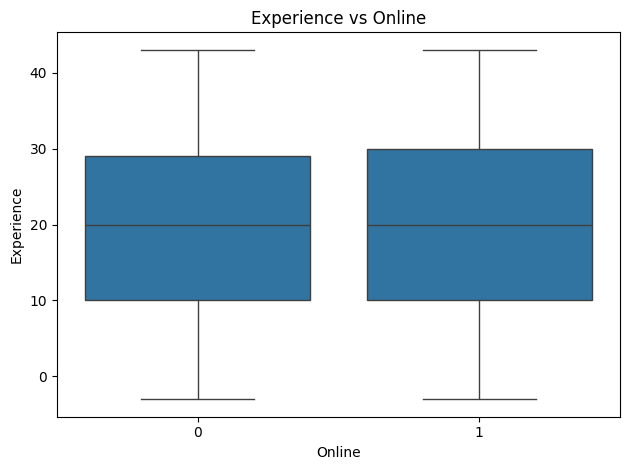

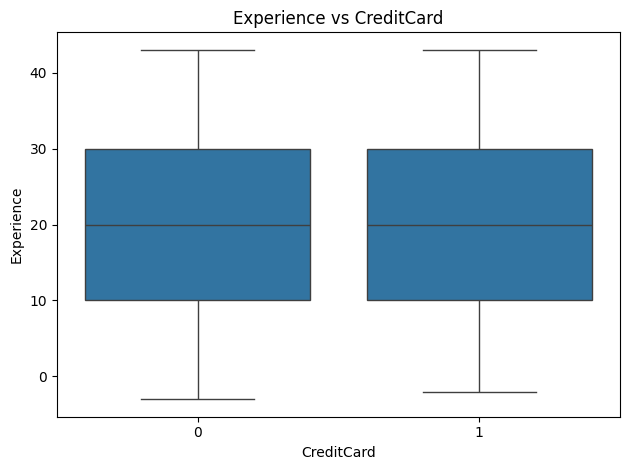

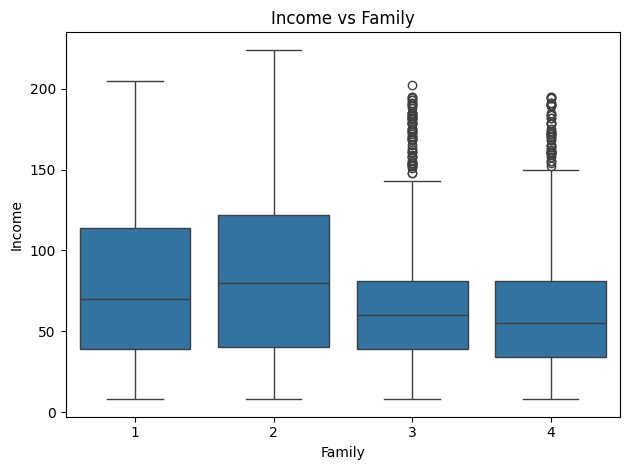

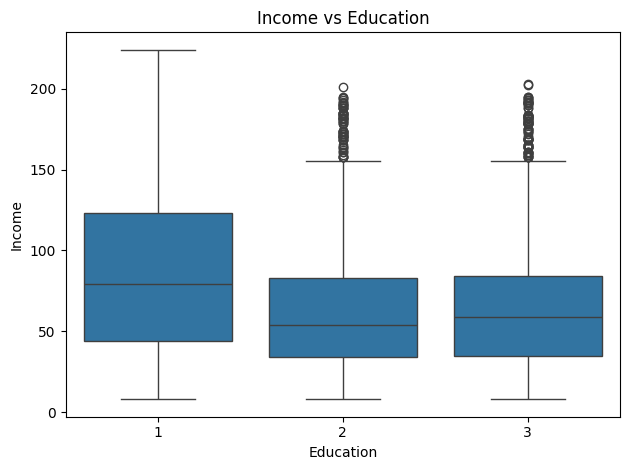

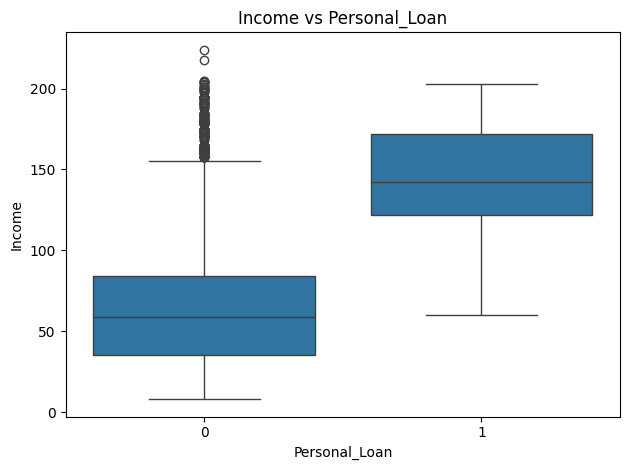

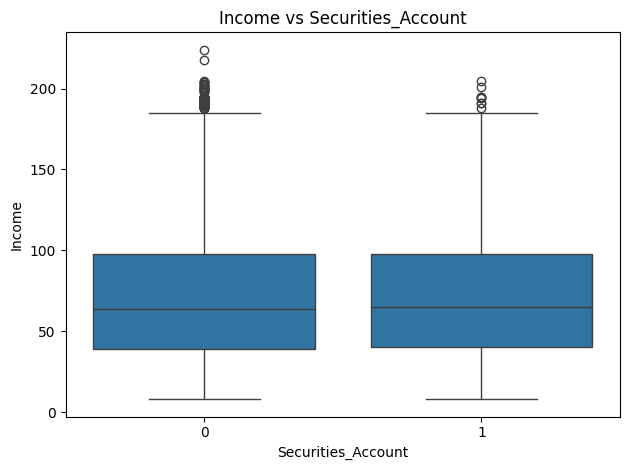

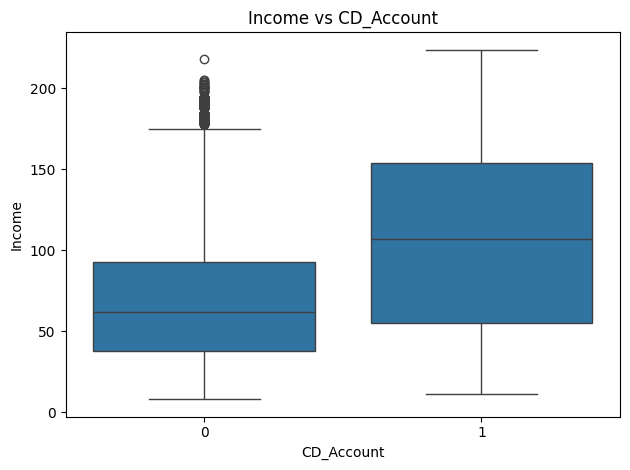

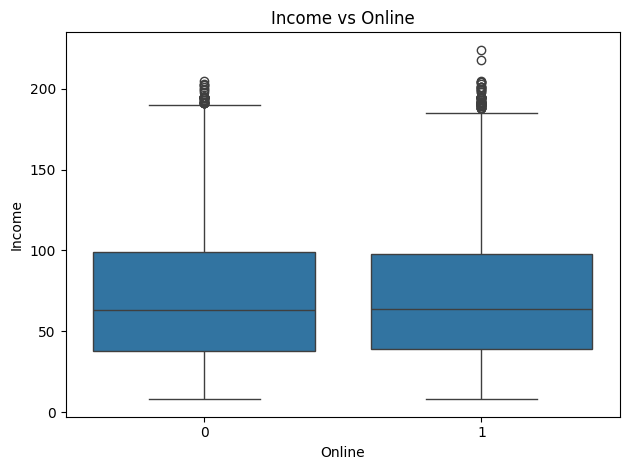

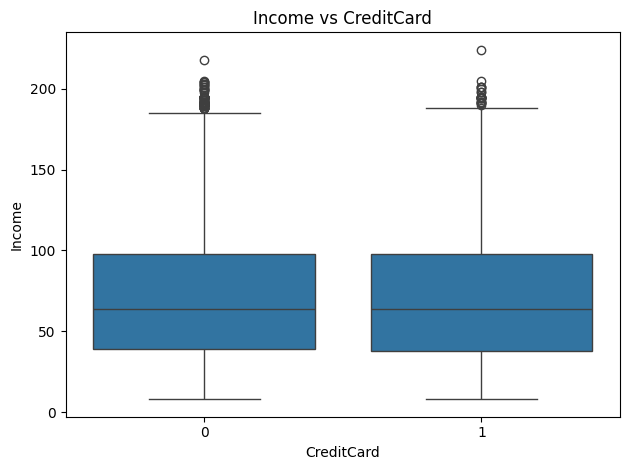

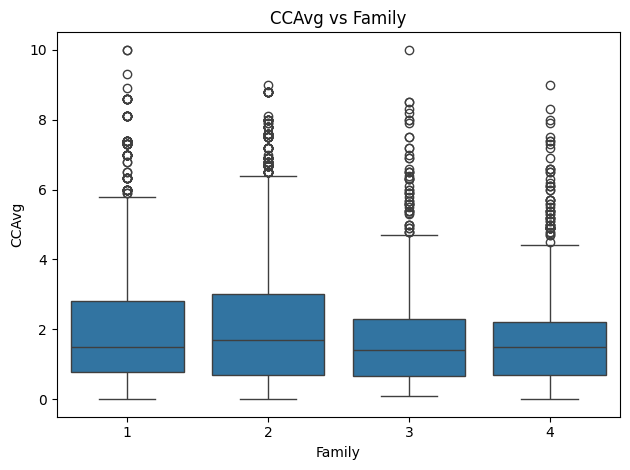

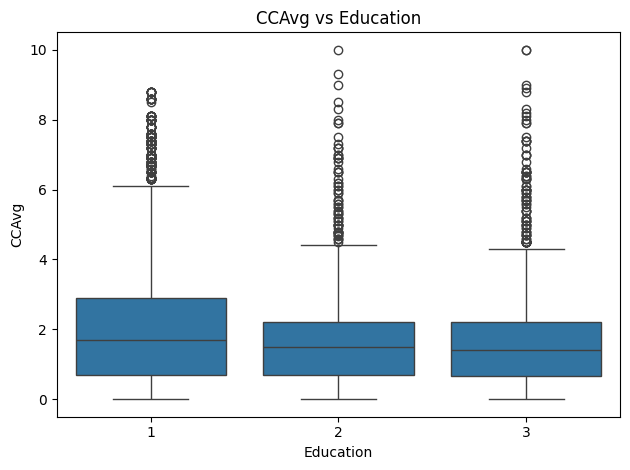

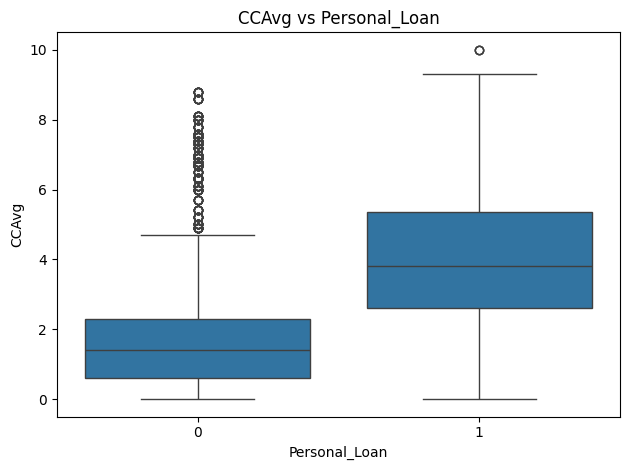

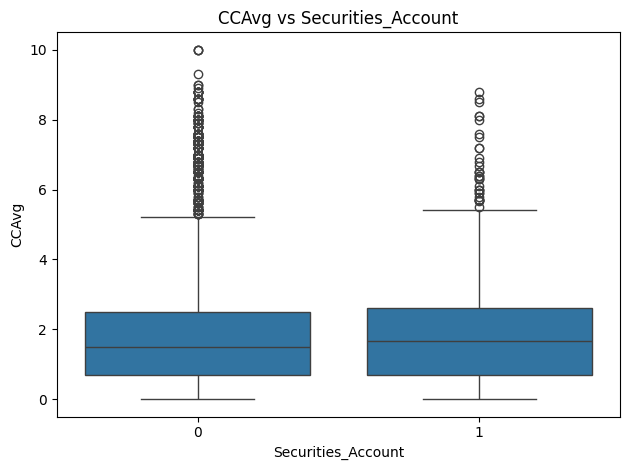

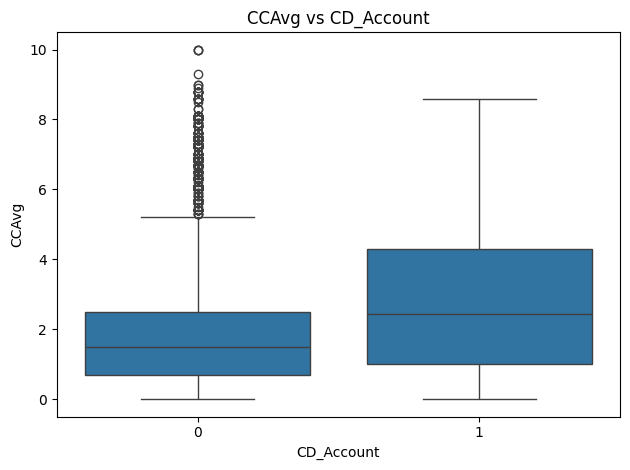

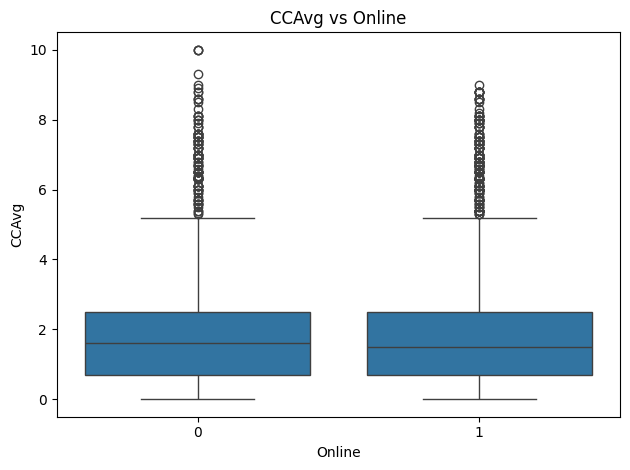

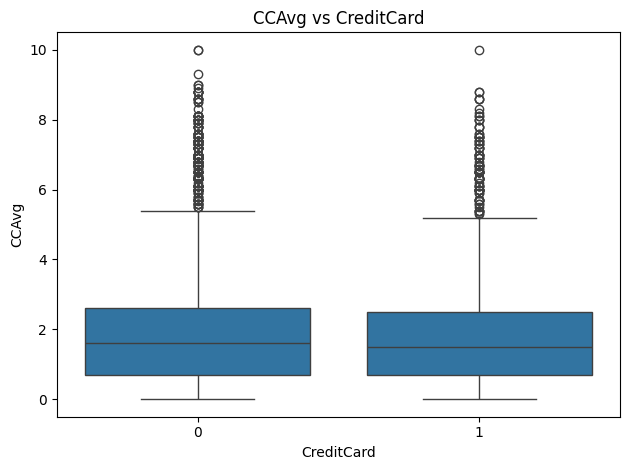

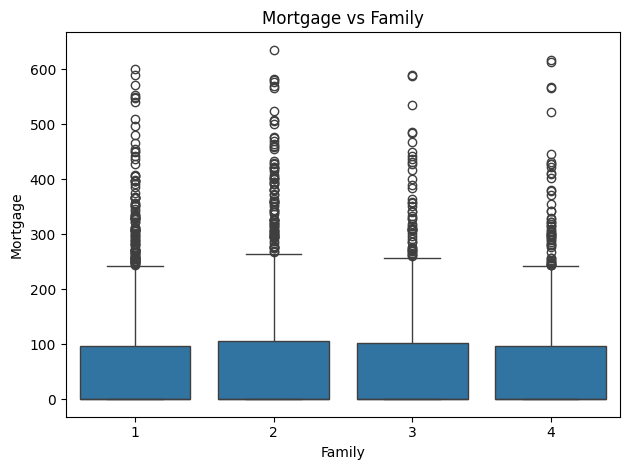

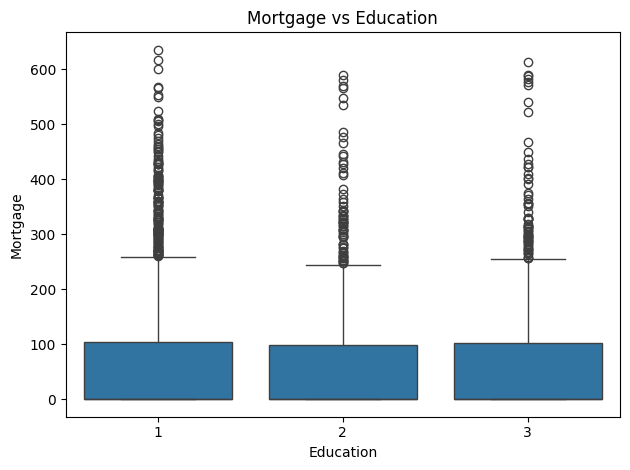

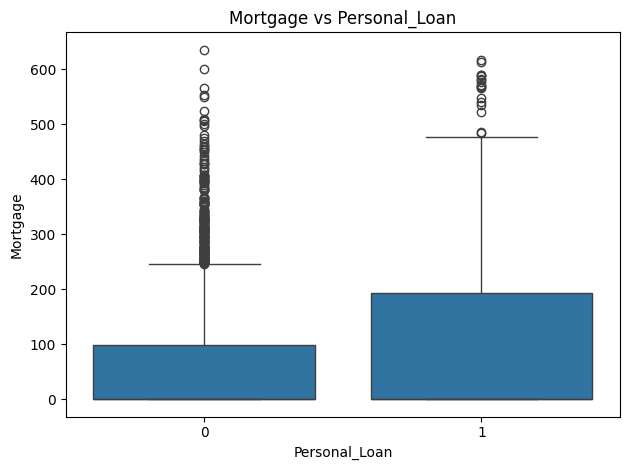

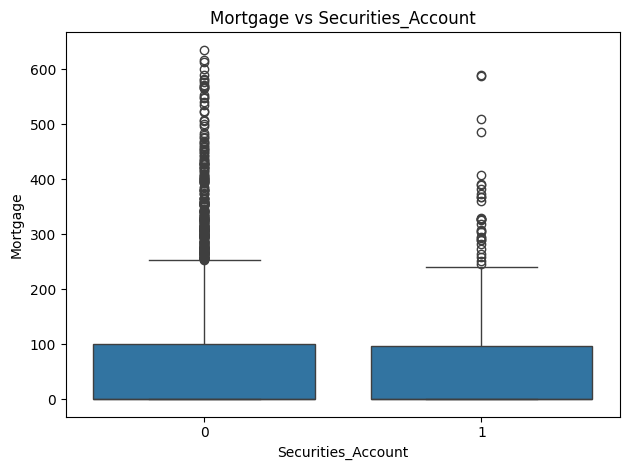

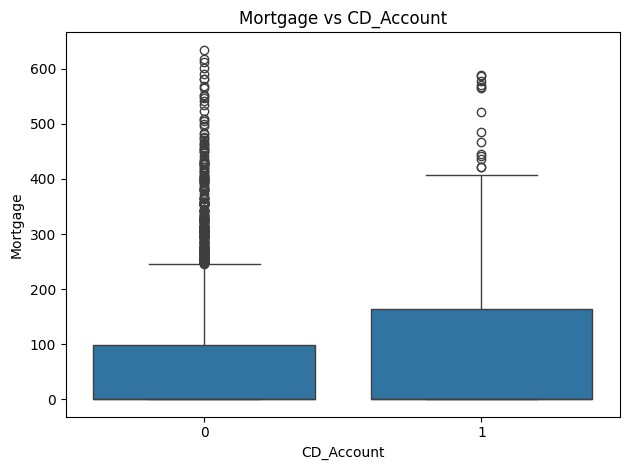

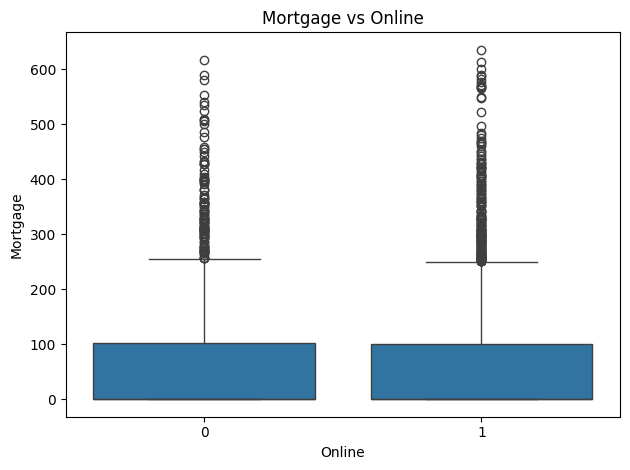

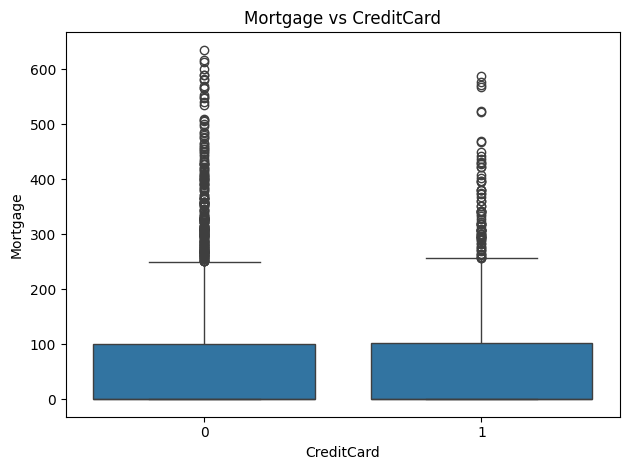

In [ ]:
categorical_cols = ['Family', 'Education', 'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard']

# Loop through each categorical variable and plot boxplot vs Price
numerical_cols =['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

for  num_col in numerical_cols:
    for cat_col in categorical_cols:
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f"{num_col} vs {cat_col}")
        plt.tight_layout()
        plt.show()
# Person with income more than 100 have more chances of taking personal loan.
# Family of 3 and 4 have income less than 100.Only few outliers where they have income more than 100.
# Education level 2 and 3 majority have income below 100 and few outliers with income more than 100.
# When income is less than 100 then Personal loan is not taken.
# Person with income more than 100 have high chances of having CD account.
# CCavg More than 2 then more chance of taking Personal_loan.


In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop(columns=['ZIPCode', 'Personal_Loan'])  # Drop ID and ZIPCode
y = df['Personal_Loan']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,stratify=y ,random_state=42)

In [ ]:
x_train.shape
print(100*y_train.value_counts(),'\n')
x_test.shape
print(100*y_test.value_counts(),'\n')


Personal_Loan
0    361600
1     38400
Name: count, dtype: int64 

Personal_Loan
0    90400
1     9600
Name: count, dtype: int64 



In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model_logreg = LogisticRegression(class_weight='balanced',random_state=42)
model_logreg.fit(x_train_scaled, y_train)

# Predict on test set
y_pred = model_logreg.predict(x_test_scaled)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# The accuracy is 90% ,the model now catches almost all positive cases.
# It correctly predicted 89% which are actually 0 and correctly predicted 93% times which are actually 1.
# It predicted 95 as taken loan when actually have not taken loan.
# It predicted 7 who have taken loan as not taken loan.

Confusion Matrix:
[[809  95]
 [  7  89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       904
           1       0.48      0.93      0.64        96

    accuracy                           0.90      1000
   macro avg       0.74      0.91      0.79      1000
weighted avg       0.94      0.90      0.91      1000



In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict on training data (since test set isn't meaningful here)
y_pred = model.predict(x_train)

# Evaluation
print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



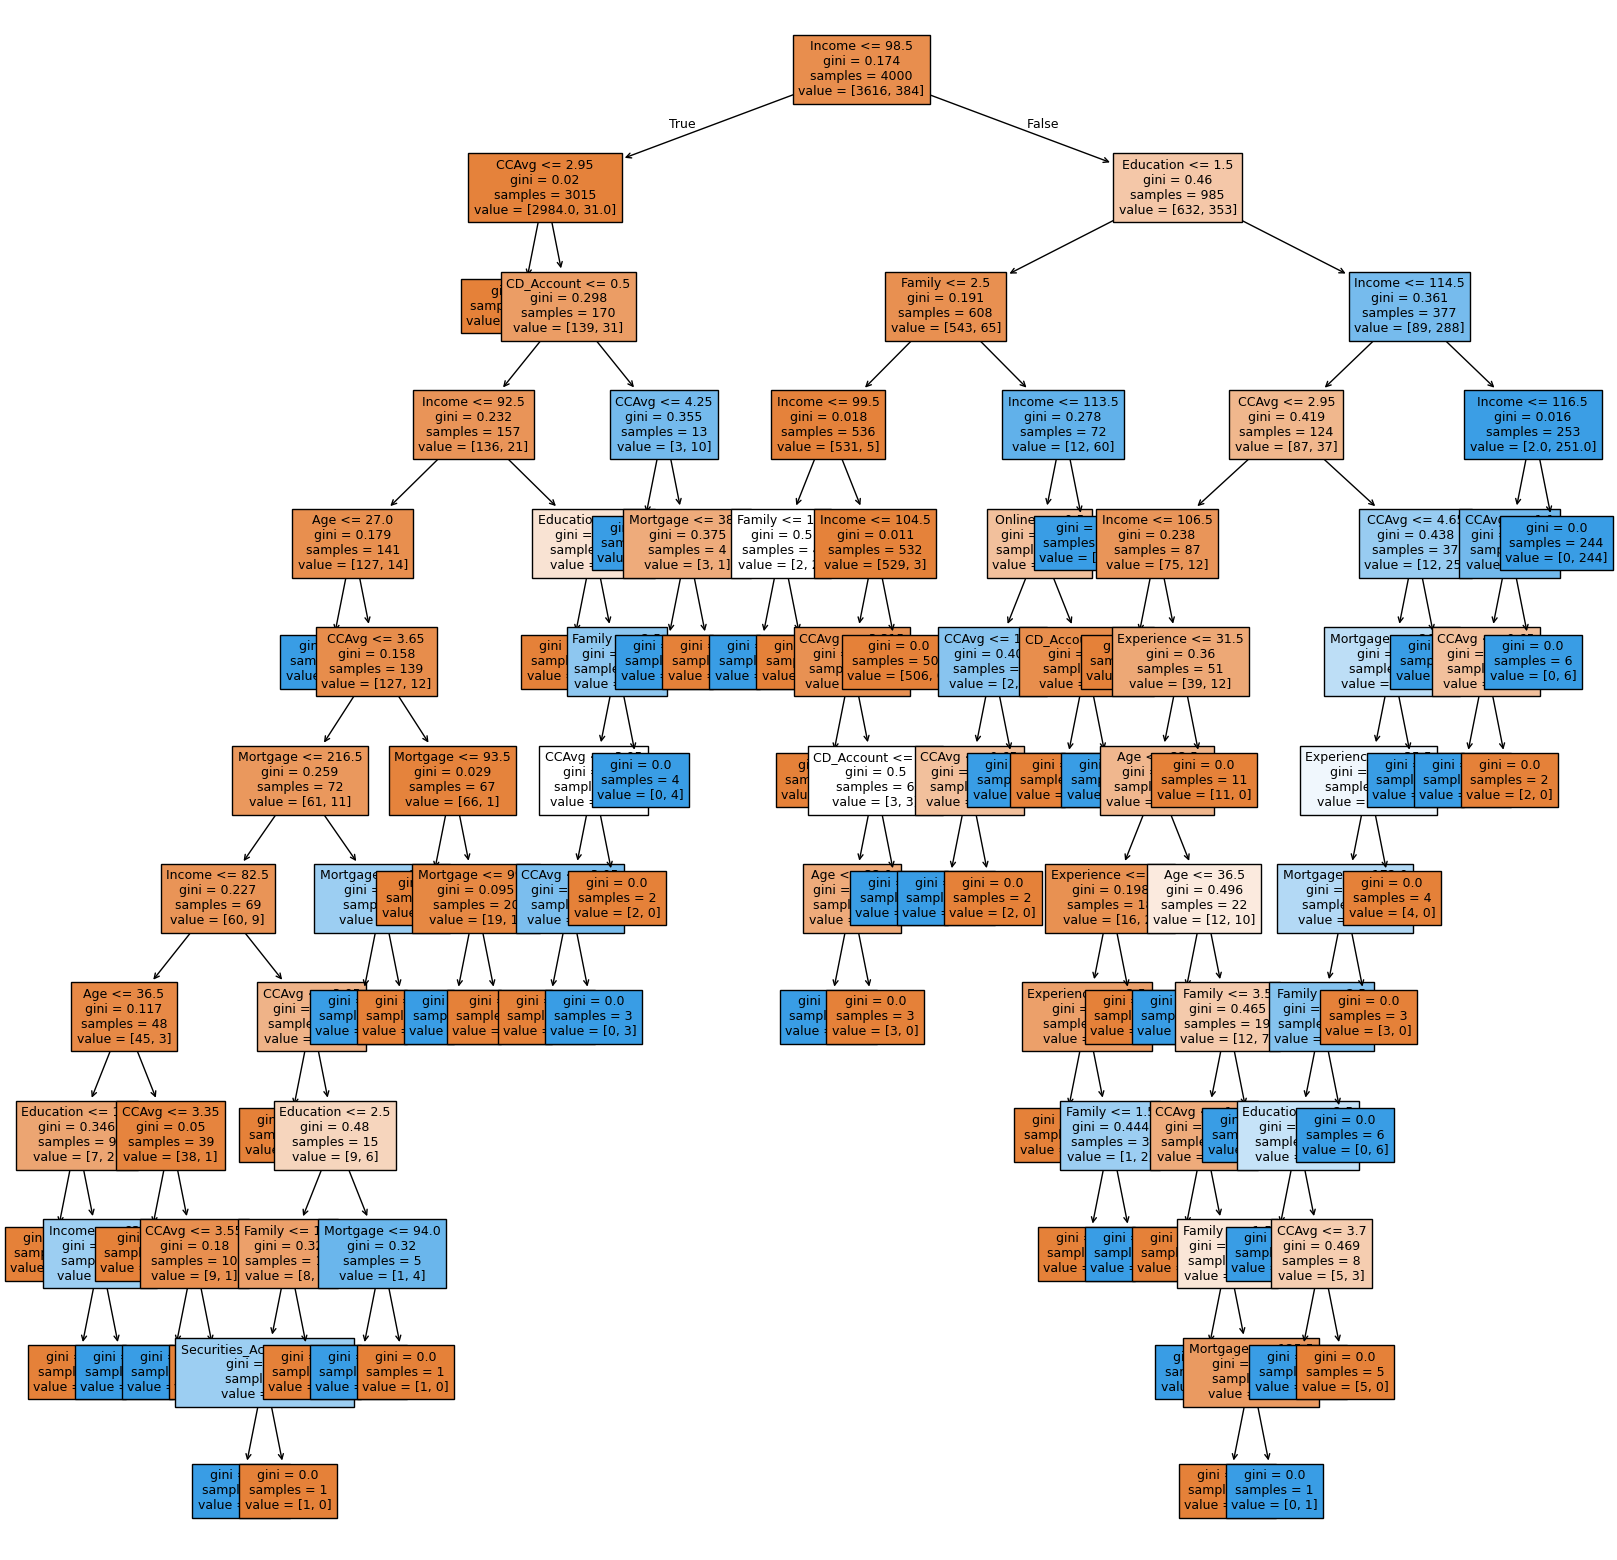

In [ ]:
feature_names= list(x_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9)
plt.show()

# So Income is the most significant predictor of whether someone takes a personal loan.
# If Income is <= 98.5 and CCAvg is <= 2.95, most predictions are class 0 which is no loan.
# If Income > 98.5 or Education > 1.5 or CD_Account = 1, then there's a higher chance of class 1 which is taken loan.

In [ ]:
# Grid of values for pre-pruning
max_depth_values = np.arange(2, 11, 2)
max_leafnode_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

best_estimator = None
best_score_diff = float('inf')

# Iterate over all combinations of parameter values
for max_depth in max_depth_values:
    for max_leafnode in max_leafnode_values:
        for min_samples_split in min_samples_split_values:
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leafnode,
                min_samples_split=min_samples_split,
                random_state=42
            )
            estimator.fit(x_train, y_train)

            # Get predictions
            y_train_pred = estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            # F1 scores
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # Track model with smallest train-test F1 score gap
            score_diff = abs(train_f1_score - test_f1_score)
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

# Fit best model again
model = best_estimator
model.fit(x_train, y_train)

# print best parameters
print("\nBest Model Parameters:")
print(f"Max Depth: {model.get_params()['max_depth']}")
print(f"Max Leaf Nodes: {model.get_params()['max_leaf_nodes']}")
print(f"Min Samples Split: {model.get_params()['min_samples_split']}")

# Evaluate best model on test data
y_test_pred = model.predict(x_test)
print("\nTest Accuracy of Best Model:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))




Best Model Parameters:
Max Depth: 6
Max Leaf Nodes: 30
Min Samples Split: 10

Test Accuracy of Best Model: 0.986
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.90      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000



Training Accuracy: 0.98775

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3616
           1       0.96      0.91      0.93       384

    accuracy                           0.99      4000
   macro avg       0.97      0.95      0.96      4000
weighted avg       0.99      0.99      0.99      4000



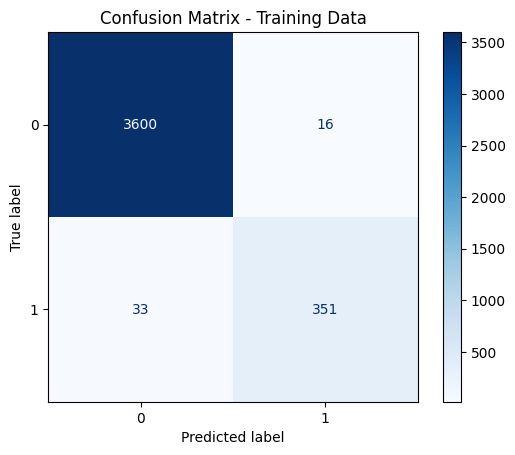

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(x_train)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

# Class 0 (Did not take loan): Precision: 0.99 means all predicted non-loan takers are actually correct.
# Recall is 1.00 identified all non-loan takers correctly.
# F1-score is 0.99 Perfect score of precision and recall for class 0.

# Class 1 (Took loan): Precision is 0.96 out of all predicted loan takers, 96% were actually correct.
# Recall is 0.91 correctly identified 91% of all actual loan takers.
# F1-score is 0.93 slightly lower than class 0, indicating room for improvement in capturing all positive cases.

# Macro Avg (unweighted mean): F1-score of 0.96, showing good overall balance between the two classes.

# Weighted Avg: Weighted by class frequency, shows high consistency across the whole dataset

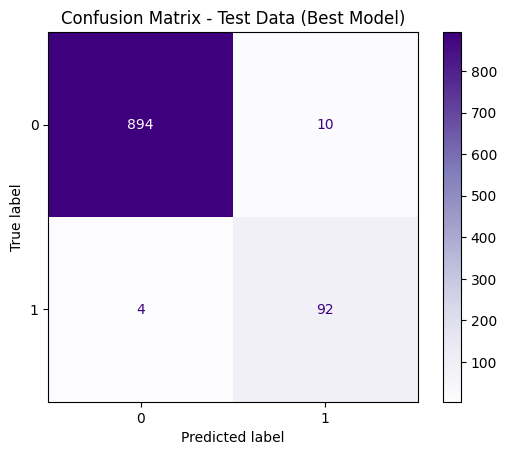

In [ ]:
# Evaluate on test data
y_test_pred = model.predict(x_test)

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Purples')
plt.title("Confusion Matrix - Test Data (Best Model)")
plt.show()


In [ ]:
# The model performs exceptionally well on the test set.
# It correctly identifies 92 out of 96 actual loan takers (high recall) and only makes 10 false positives.
# Only 4 actual loan takers were missed, which is minimal.
# This indicates that the model perfomed well even on the test data.
#The slight dip in precision on the test set is expected and acceptable.
# No clear signs of overfitting, as metrics are comparable across datasets.
# Decision Tree model is well-generalized, with no signs of overfitting based on the small gap between training (98.78%) and test (98.6%) accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [10, 20, 30, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best cross-validation score: 0.9817500000000001


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Accuracy 99% correctly predicted 99% of all test cases.
# The model performs consistently well across both classes, not just the majority class.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.94      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



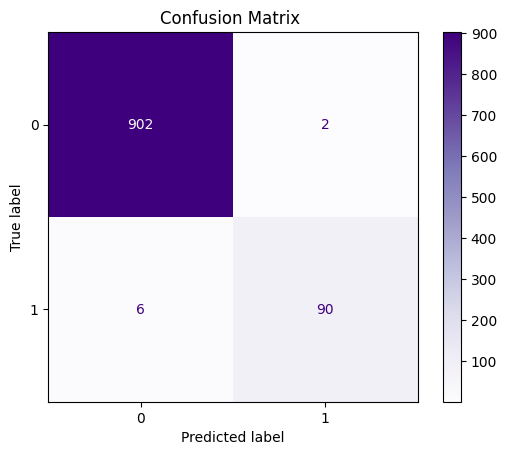

In [ ]:
# Evaluate on test data
y_test_pred = best_model.predict(x_test)

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Purples')
plt.title("Confusion Matrix ")
plt.show()

# This shows that model has correctly predicted not taking loan and taking loan.
# The model predicted only 2 who are not taking loan as taking loan.
# The model predicted only 6 who are taking loan as not taking loan.
# There is only small mistake in the prediction but most of the time it is predicting correctly.
# The best model is with the following parameters-{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10}

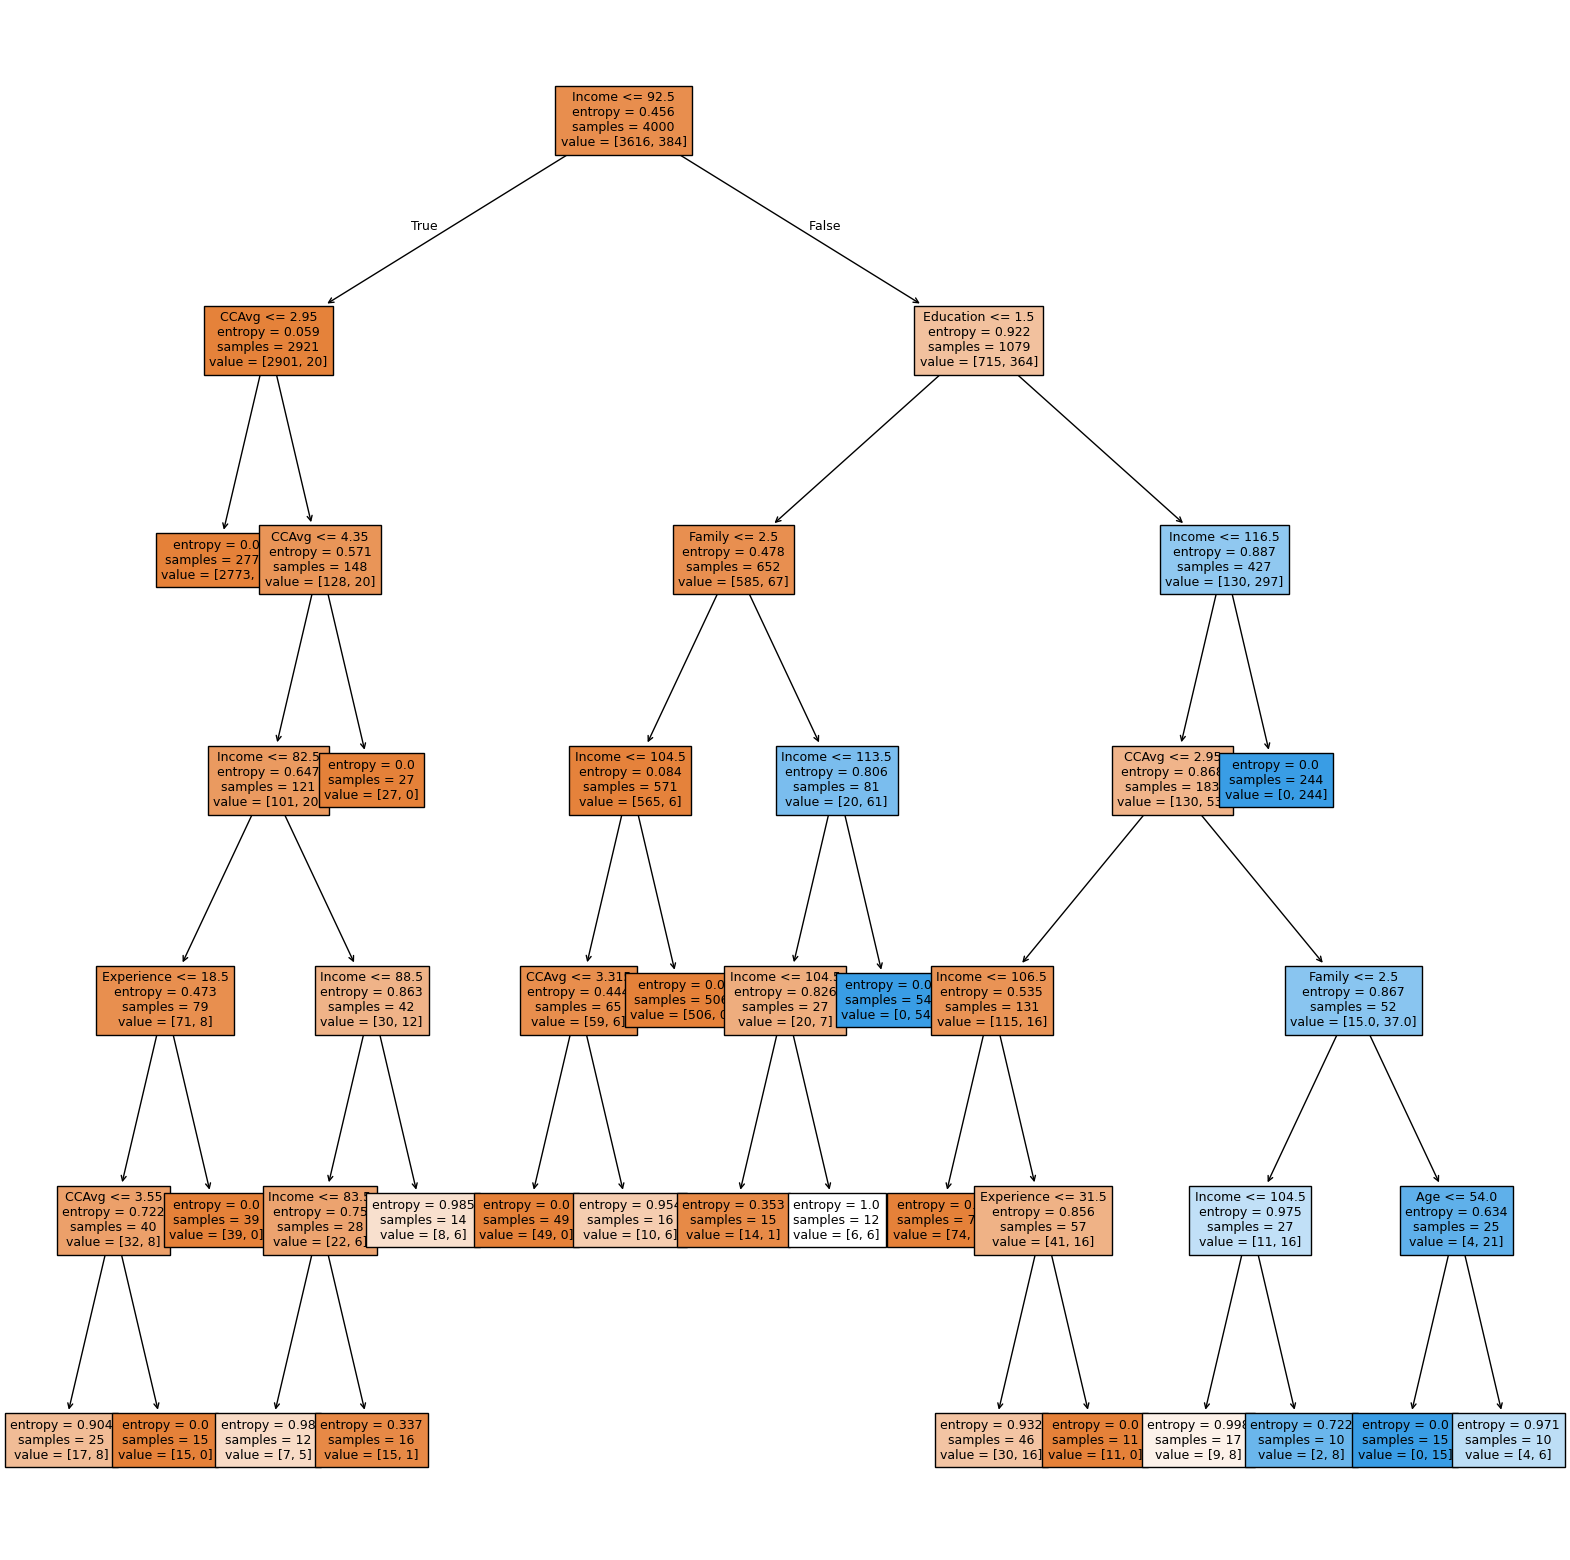

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names= list(x_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(best_model, feature_names=feature_names, filled=True, fontsize=9)
plt.show()

# Income above 92.5 and education > 1.5 are taking loan (class 1).
# CCAvg > 2.92 also indicating taking loan.
# so these parameter when they have all these values indicate that there is high chance of taking loan.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [ ]:
tsne= TSNE(n_components=2 , n_jobs=2, random_state=42)
tsne_reduced_data=tsne.fit_transform(scaled)
tsne_2d_data=pd.DataFrame(tsne_reduced_data, columns=(['feat1','feat2']))
tsne_2d_data.head(10)

,feat1,feat2
0,44.828434,-30.708828
1,46.822346,-31.698467
2,15.133970,-31.450279
3,11.696968,-54.043312
4,29.515373,15.664827
5,-50.279091,-11.908995
6,-46.139370,10.759909
7,33.439209,6.463618
8,-48.273830,-6.523677
9,77.322273,-1.163392


<Axes: xlabel='feat1', ylabel='feat2'>

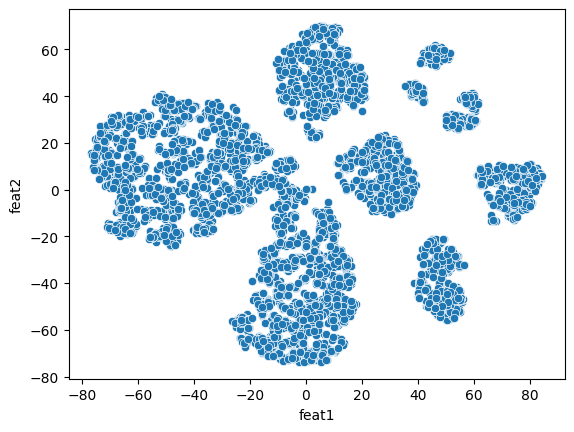

In [ ]:
sns.scatterplot(data=tsne_2d_data, x='feat1', y='feat2')

In [ ]:
tsne= TSNE(n_components=2 ,perplexity=50, n_jobs=-2, random_state=42)
tsne_reduced_data=tsne.fit_transform(scaled)
tsne_2d_data=pd.DataFrame(tsne_reduced_data, columns=(['feat1','feat2']))
tsne_2d_data.head(10)

,feat1,feat2
0,40.832035,-27.759924
1,42.789478,-26.101137
2,7.768885,-26.250738
3,12.960541,-47.476898
4,23.003296,9.791409
5,-36.084000,22.095984
6,-39.587421,4.686862
7,20.147549,1.438079
8,-35.656937,17.667494
9,68.288979,-0.011178


<Axes: xlabel='feat1', ylabel='feat2'>

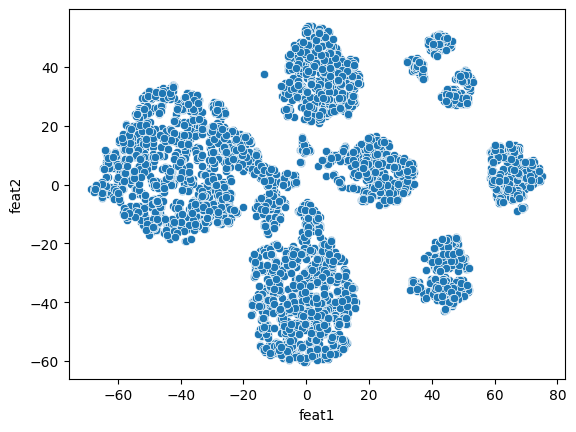

In [ ]:
sns.scatterplot(data=tsne_2d_data, x='feat1', y='feat2')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow method to choose optimal k
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)



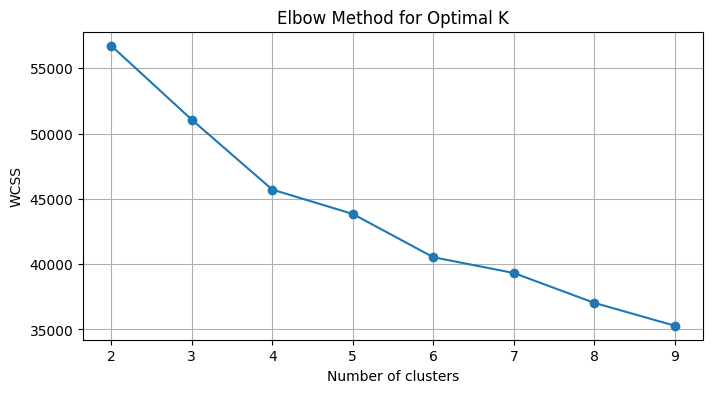

In [ ]:
# Plot elbow
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.xticks(range(2,10))
plt.show()

#The optimum k will be 4 as wcss would not decrease much after 3.

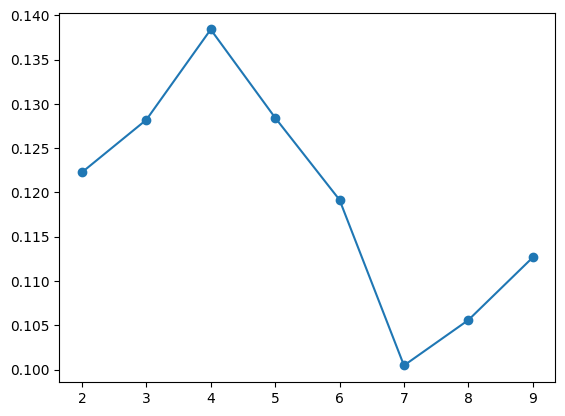

In [ ]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    score=silhouette_score(scaled_data, kmeans.labels_)
    sil_score.append(score)
plt.plot(range(2,10), sil_score, marker='o')

# Upto 4 there is increase and after that there is decrease. So optimum value of k is 4.

<Axes: xlabel='feat1', ylabel='feat2'>

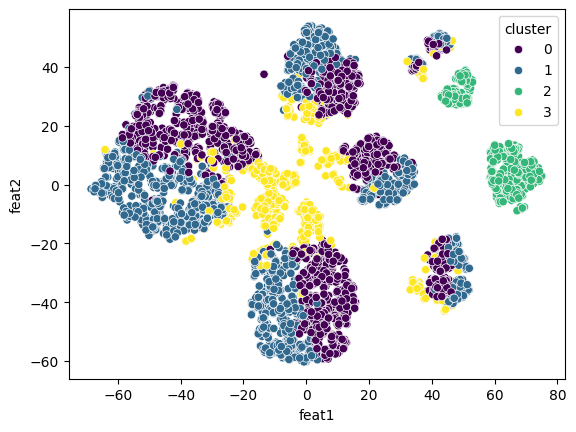

In [ ]:
# Apply KMeans with k=4 (assume from elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

tsne_2d_data['cluster'] = kmeans.labels_ # Add cluster labels to the t-SNE data

sns.scatterplot(data=tsne_2d_data, x='feat1', y='feat2', hue='cluster', palette='viridis') # Use tsne_2d_data for plotting

In [ ]:
df['cluster']=kmeans.labels_
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,cluster
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0


cluster
1    1956
0    1896
3     668
2     480
Name: count, dtype: int64 



Text(0.5, 1.0, 'distribution of cluster')

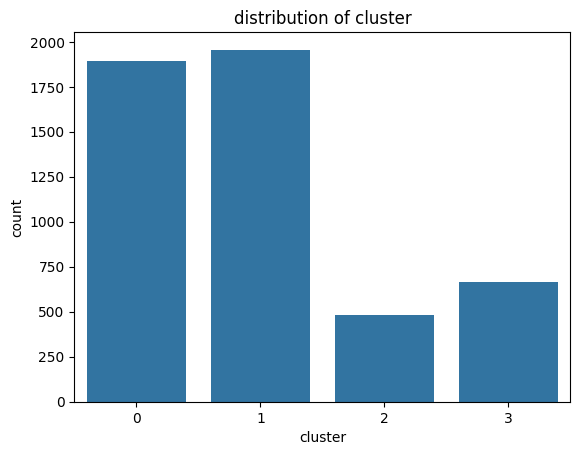

In [ ]:
print(df['cluster'].value_counts(),'\n')
sns.countplot(data=df, x='cluster')
plt.title('distribution of cluster')

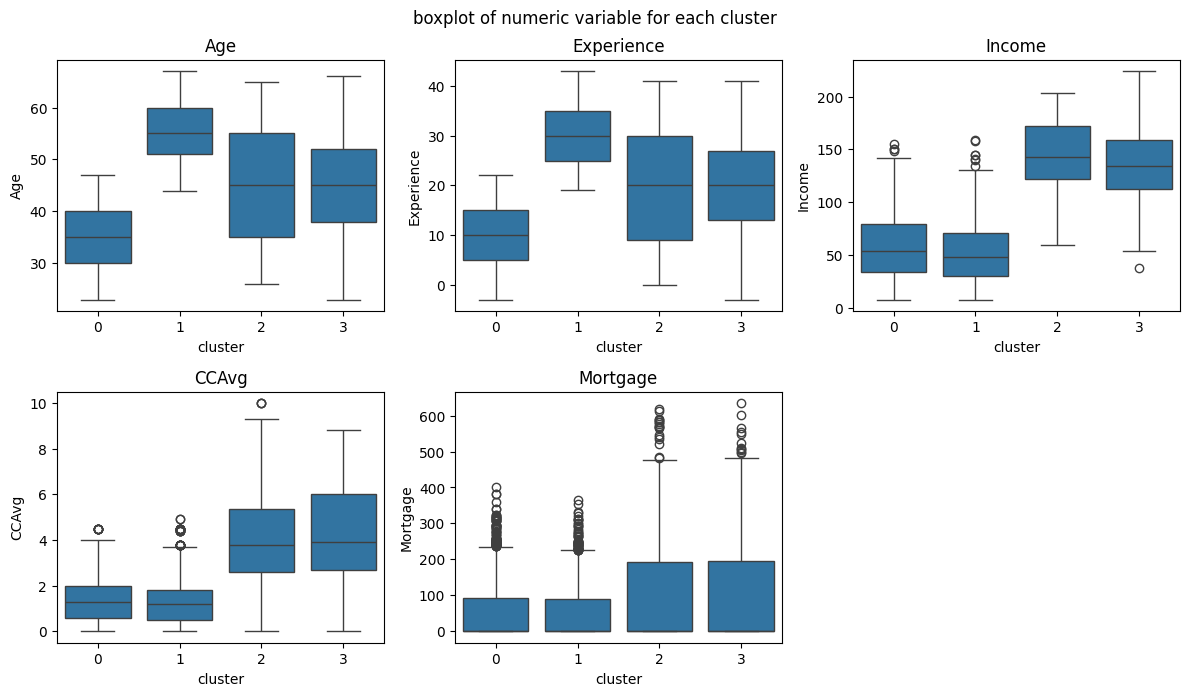

In [ ]:
plt.figure(figsize=(12,10))
plt.suptitle("boxplot of numeric variable for each cluster")
for i, var in enumerate(df_numerics.columns.to_list()): # Fixed slicing here
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x='cluster', y=var)
    plt.title(var)
plt.tight_layout()